In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,Adamax,RMSprop,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.utils import to_categorical, plot_model
from keras.preprocessing import image


In [2]:
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test" 

In [3]:
print('Train Directory :')
print(os.listdir(train_dir))

print('Test Directory :')
print(os.listdir(test_dir))

Train Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Test Directory :
['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [4]:
%%capture
!rm -r /kaggle/input/fer2013/test/disgust
!rm -r /kaggle/input/fer2013/train/disgust

In [5]:
print('Count of Images in Training Set: ')
for exp in os.listdir(train_dir):
    print(str(len(os.listdir(train_dir+'/'+exp)))+" "+exp+" "+"images")

Count of Images in Training Set: 
3171 surprise images
4097 fear images
3995 angry images
4965 neutral images
4830 sad images
436 disgust images
7215 happy images


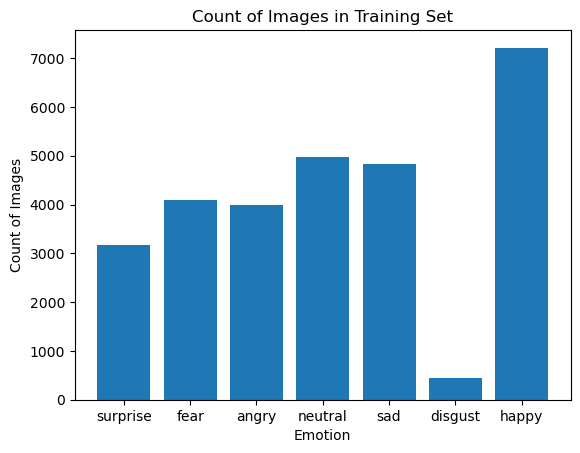

In [6]:
emotion_count = {}

for exp in os.listdir(train_dir):
    emotion_count[exp] = len(os.listdir(train_dir+'/'+exp))

plt.bar(emotion_count.keys(), emotion_count.values())
plt.title('Count of Images in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count of Images')
plt.show()


In [7]:
print('Count of Images in Testing Set: ')
for exp in os.listdir(test_dir):
    print(str(len(os.listdir(test_dir+'/'+exp)))+" "+exp +" "+"images")

Count of Images in Testing Set: 
831 surprise images
1024 fear images
958 angry images
1233 neutral images
1247 sad images
111 disgust images
1774 happy images


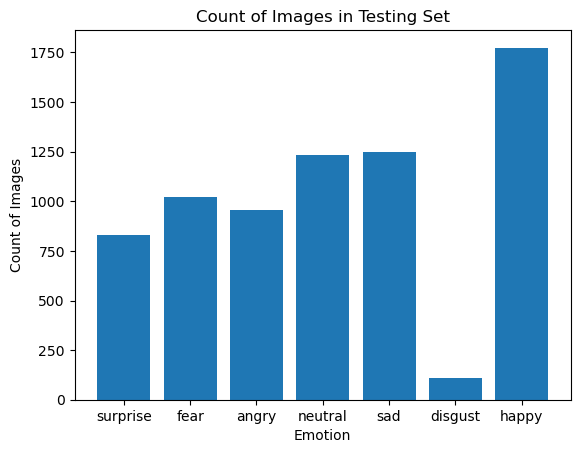

In [8]:
emotion_count1 = {}

for exp in os.listdir(test_dir):
    emotion_count1[exp] = len(os.listdir(test_dir+'/'+exp))

plt.bar(emotion_count1.keys(), emotion_count1.values())
plt.title('Count of Images in Testing Set')
plt.xlabel('Emotion')
plt.ylabel('Count of Images')
plt.show()


In [9]:
def plot_images(img_dir, top=10):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    plt.figure(figsize=(10, 10))
    for i, emotion in enumerate(emotions):
        img_path = os.path.join(img_dir, emotion)
        all_img_dirs = os.listdir(img_path)
        img_files = [os.path.join(img_path, file) for file in all_img_dirs][:5]
        for j, img_path in enumerate(img_files):
            plt.subplot(7, 5, i*5+j+1)
            img = plt.imread(img_path)
            plt.tight_layout()         
            plt.imshow(img, cmap='gray')
            plt.title(emotion)
            plt.axis('off')


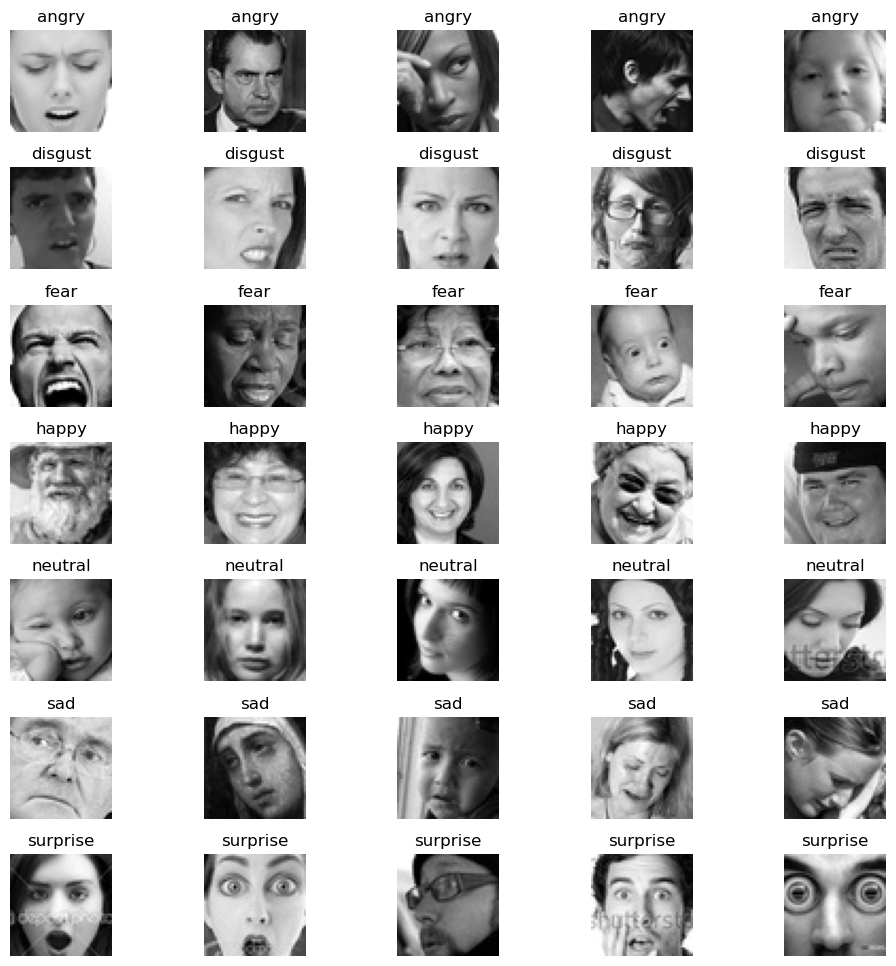

In [10]:
plot_images(train_dir)

In [11]:
img_size = 48

In [12]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [13]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [14]:
model=Sequential()

In [15]:


model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [16]:
epochs = 60
batch_size = 64

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

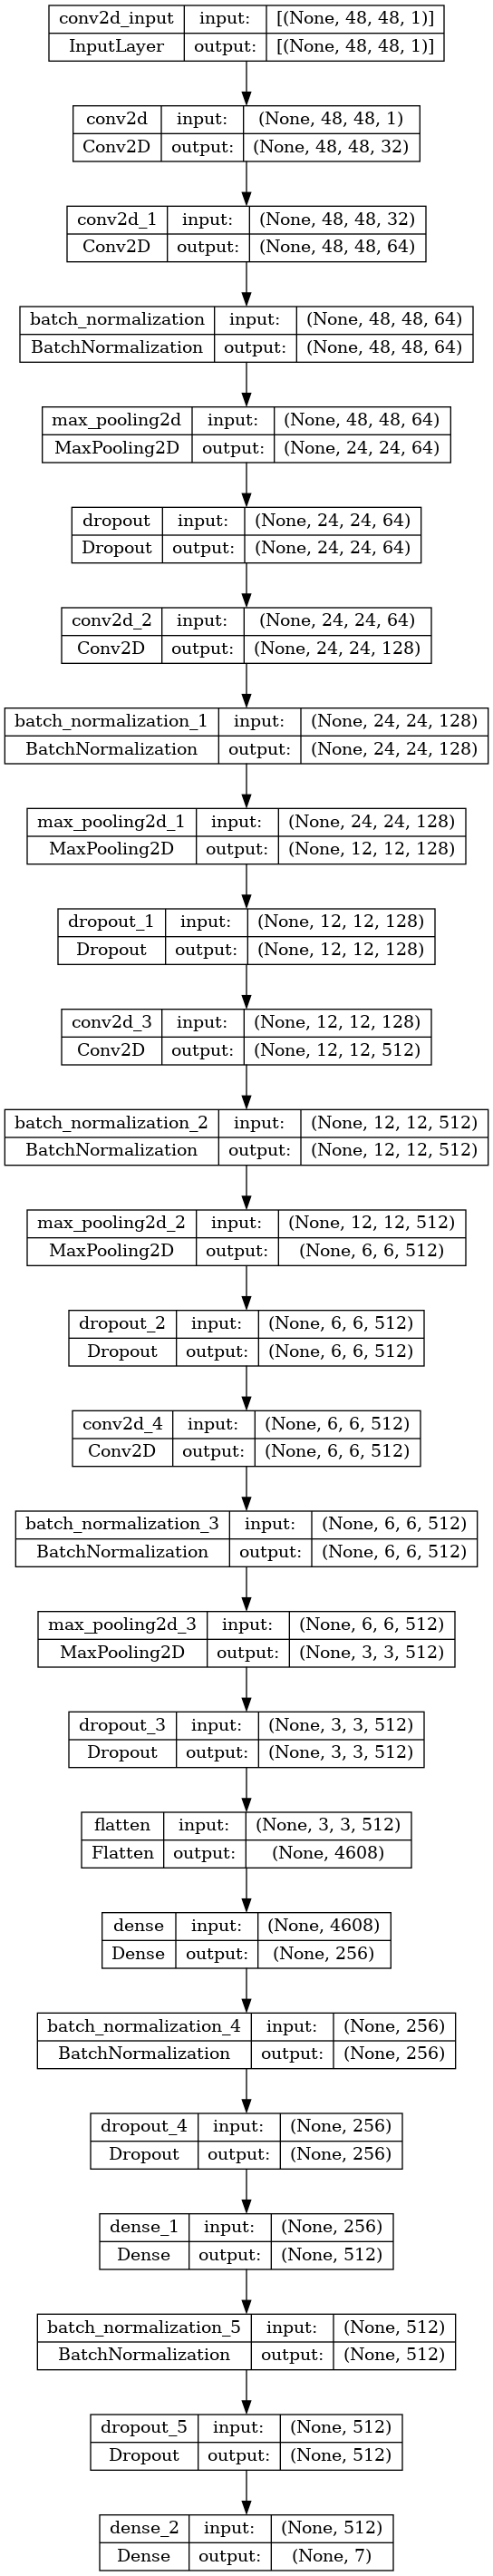

In [18]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    min_delta=0.0001
)


workers = 4

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback],
    workers=workers
)


Epoch 1/60


2023-04-29 11:49:16.028531: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


358/359 [============================>.] - ETA: 0s - loss: 5.2114 - accuracy: 0.2184
Epoch 1: val_accuracy improved from -inf to 0.17109, saving model to model_weights.h5
359/359 [==============================] - 52s 103ms/step - loss: 5.2040 - accuracy: 0.2186 - val_loss: 2.6275 - val_accuracy: 0.1711 - lr: 0.0010
Epoch 2/60
358/359 [============================>.] - ETA: 0s - loss: 2.3176 - accuracy: 0.3099
Epoch 2: val_accuracy improved from 0.17109 to 0.34567, saving model to model_weights.h5
359/359 [==============================] - 34s 95ms/step - loss: 2.3177 - accuracy: 0.3097 - val_loss: 2.2702 - val_accuracy: 0.3457 - lr: 0.0010
Epoch 3/60
358/359 [============================>.] - ETA: 0s - loss: 2.2894 - accuracy: 0.3974
Epoch 3: val_accuracy improved from 0.34567 to 0.36034, saving model to model_weights.h5
359/359 [==============================] - 34s 94ms/step - loss: 2.2897 - accuracy: 0.3975 - val_loss: 2.9052 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 4/60
359/359 [

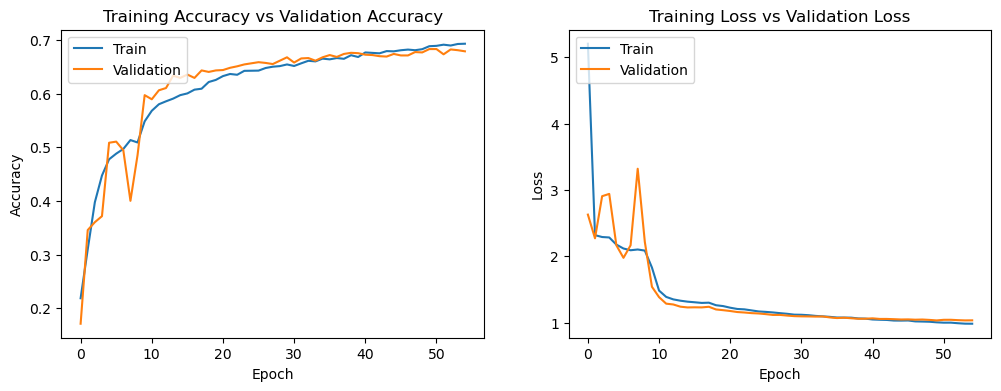

In [20]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

23/23 [==============================] - 2s 57ms/step


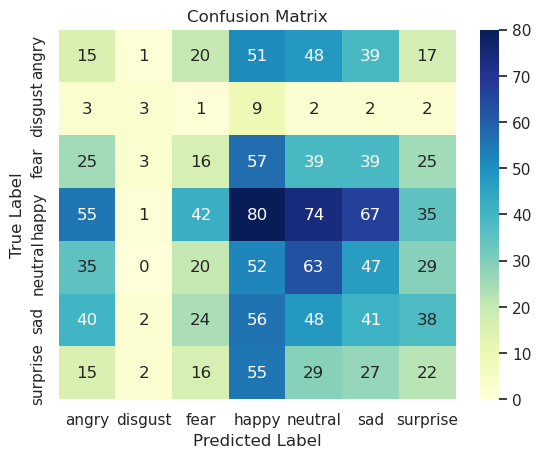

In [21]:
import seaborn as sns 

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
model.save('emotion_detection_model1.h5')